In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from treatment import get_treated_data

In [34]:
X_train, X_test, y_train, y_test = get_treated_data()

In [35]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
clf = decision_tree_model.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred = decision_tree_model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9668161434977578


In [38]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.90      0.85      0.87       149

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [39]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

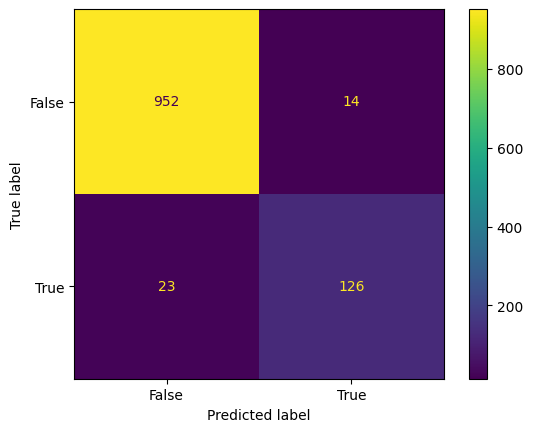

In [40]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [41]:
#Implementação do Grid Search

In [42]:
param_grid ={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [43]:
grid_search = GridSearchCV(decision_tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [44]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}


In [45]:
best_decision_tree_model = grid_search.best_estimator_


In [46]:
best_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [47]:
grid_pred = best_decision_tree_model.predict(X_test)

In [48]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9551569506726457


In [49]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       966
           1       0.90      0.74      0.82       149

    accuracy                           0.96      1115
   macro avg       0.93      0.87      0.90      1115
weighted avg       0.95      0.96      0.95      1115



In [50]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

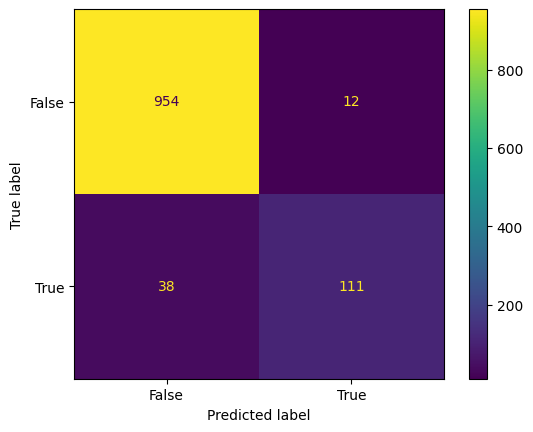

In [51]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()